In [1]:
#from bitalg.Projekt.main import main
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
from bitalg.visualizer.main import Visualizer
from bitalg.Projekt.utils.classes.Triangle import Triangle
from bitalg.Projekt.utils.classes.Section import Section
from bitalg.Projekt.utils.classes.Point import Point



Point: (5,4)
Section: ([(5, 4), (3, 0)])
Triangle:
[(5, 4), (3, 0)]
[(5, 4), (1, 7)]
[(1, 7), (3, 0)]


-2.727272727272728 -6.636363636363637 -0.8181818181818099
True
-2.727272727272728 -6.636363636363637 -0.8181818181818099
False

-2.727272727272728 -6.636363636363637 -0.8181818181818099
Circle parameters:  Point: (1.363636363636364,3.3181818181818183) 3.699731953659023


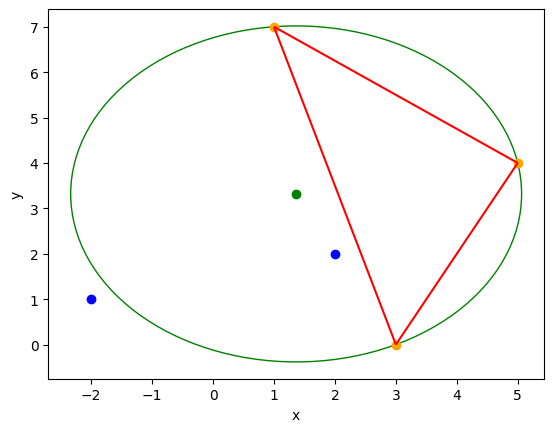

In [2]:
p1: Point = Point(5,4)
p2: Point = Point(3,0)
p3: Point = Point(1,7)

print(p1)
sec1: Section = Section(p1,p2)
sec2: Section = Section(p2,p3,)
sec3: Section = Section(p1,p3,)
print(sec1)
t1: Triangle = Triangle(p1,p2,p3)
print(t1)

p4: Point = Point(2,2)
P, r = t1.define_circle()
print(p4.in_circle(P,r))


p5: Point = Point(-2,1)
P, r = t1.define_circle()
print(p5.in_circle(P,r))


vis = Visualizer()

T1 = Triangle(p1,p2,p3)
print()

q, r = T1.define_circle()


print("Circle parameters: ",q,r)
vis.add_circle([q.get_cords()[0],q.get_cords()[1],r],fill=False,color="green")
vis.add_point(q.get_cords(),color="green")
vis.add_point([p1.get_cords(),p2.get_cords(),p3.get_cords()],color="orange")
vis.add_line_segment(T1.get_list_edges(),color="red")
vis.add_point([p4.get_cords(),p5.get_cords()],color = "blue")
vis.show()


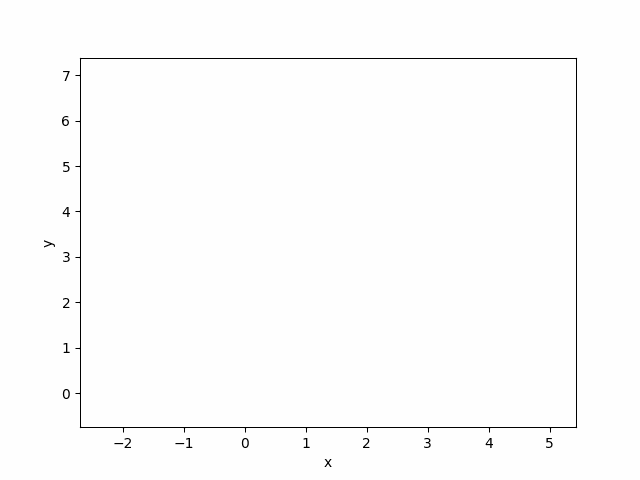

In [3]:
vis.show_gif(300)

In [4]:
import random
from bitalg.Projekt.utils.initial_triangle import get_initial_triangle

def generate_uniform_points(left=-100, right=100, n=100):
    result = []
    for _ in range(n):
        x = random.uniform(left,right)
        y = random.uniform(left,right)
        result.append(Point(x,y))

    return result

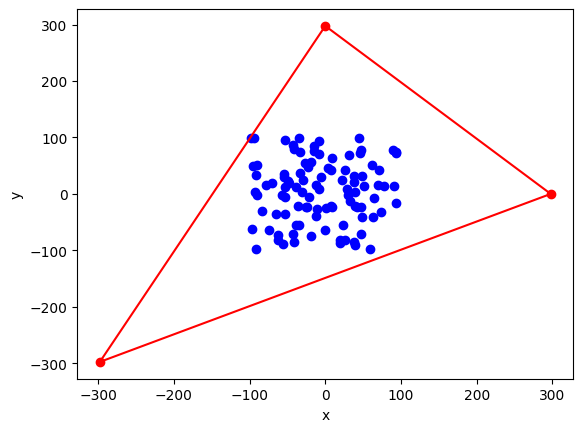

In [5]:
cloud = generate_uniform_points()

T1 = get_initial_triangle(cloud)

vis = Visualizer()

vis_points = [pt.get_cords() for pt in cloud]
vis.add_point(vis_points, color="blue")
vis.add_line_segment(T1.get_list_edges(),color="red")
vis.add_point(T1.get_list_points(), color="red")
vis.show()

In [6]:
from utils.legality import turn
from utils.search_triangulation import find_sec_in_T, find_triangle_containg_point

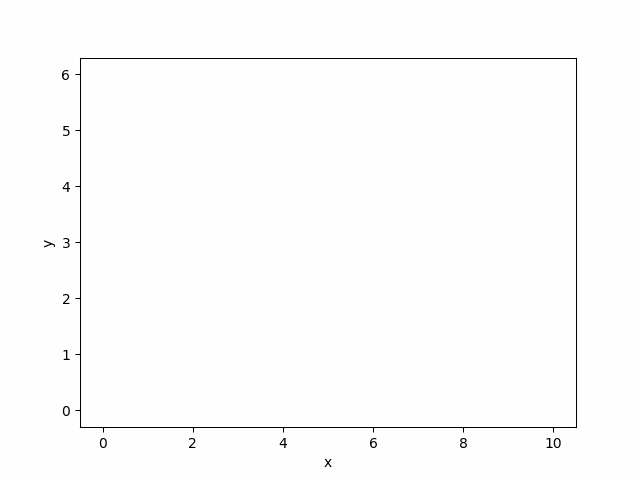

In [21]:
# testowanie turn
p1 = Point(2,2)
p2 = Point(10,0)
p3 = Point(0,5)
t1 = Triangle(p1, p2, p3)

p4 = Point(2, 6)
t2 = Triangle(p2, p3, p4)

vis = Visualizer()

T = [t1, t2]
sec = find_sec_in_T((p2, p3), T)
sec_pts = sec.get_tuple_ends()

cloud = [p1, p2, p3, p4]
vis_points = [pt.get_cords() for pt in cloud]
vis_edges = t1.get_list_edges() + t2.get_list_edges()
vis_edges = [edge for edge in vis_edges if edge != sec_pts]

vis.add_point(vis_points,color="blue")
vis.add_line_segment(vis_edges,color="red")

v_sec = vis.add_line_segment(sec_pts,color="blue")

a, b = turn(sec) # a, b to końce (Point) dodanego odcinka
new_sec = [a.get_cords(), b.get_cords()]

vis.remove_figure(v_sec)
vis.add_line_segment(new_sec, color="blue")

vis.show_gif()
